In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [3]:
# Load the dataset
file_path = "River.csv" 
data = pd.read_csv(file_path)

# Display basic info about the dataset
print(f"Dataset Shape: {data.shape}")
print(f"Dataset Columns: {data.columns}")
print(f"Dataset Info:\n{data.info()}")
print("First 5 rows of the dataset:")
print(data.head())


Dataset Shape: (128978, 9)
Dataset Columns: Index(['Index', 'pH', 'Nitrate', 'Color', 'Turbidity', 'Odor', 'Chlorine',
       'Total Dissolved Solids', 'Target'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128978 entries, 0 to 128977
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Index                   128978 non-null  int64  
 1   pH                      126457 non-null  float64
 2   Nitrate                 126728 non-null  float64
 3   Color                   128844 non-null  object 
 4   Turbidity               127865 non-null  float64
 5   Odor                    125268 non-null  float64
 6   Chlorine                127705 non-null  float64
 7   Total Dissolved Solids  128940 non-null  float64
 8   Target                  128978 non-null  int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 8.9+ MB
Dataset Info:
None
First 5 rows of the dataset:
 

In [4]:
# Handle missing values (example: dropping rows with NaN)
filtered_data = data.dropna()

# Encode categorical variables if necessary
filtered_data['Color'] = filtered_data['Color'].astype('category').cat.codes

# Drop unnecessary columns (example: 'Index')
filtered_data = filtered_data.drop(columns=['Index'], errors='ignore')

# Confirm the dataset after preprocessing
print(f"Processed Dataset Shape: {filtered_data.shape}")
print(f"Processed Dataset Info:\n{filtered_data.info()}")


Processed Dataset Shape: (118290, 8)
<class 'pandas.core.frame.DataFrame'>
Index: 118290 entries, 0 to 128977
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   pH                      118290 non-null  float64
 1   Nitrate                 118290 non-null  float64
 2   Color                   118290 non-null  int8   
 3   Turbidity               118290 non-null  float64
 4   Odor                    118290 non-null  float64
 5   Chlorine                118290 non-null  float64
 6   Total Dissolved Solids  118290 non-null  float64
 7   Target                  118290 non-null  int64  
dtypes: float64(6), int64(1), int8(1)
memory usage: 7.3 MB
Processed Dataset Info:
None


C:\Users\Dell\AppData\Local\Temp\ipykernel_12004\4211891280.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Color'] = filtered_data['Color'].astype('category').cat.codes


In [5]:
# Split the data
X = filtered_data.drop('Target', axis=1)
y = filtered_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default n_neighbors=5; 
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [8]:
# Predict on the test set
y_pred = knn_model.predict(X_test)
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]

In [9]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert accuracy to percentage
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Accuracy: 81.94%
Precision: 0.6329
Recall: 0.5218
F1 Score: 0.5720
ROC AUC: 0.8239


In [10]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[16531  1656]
 [ 2616  2855]]


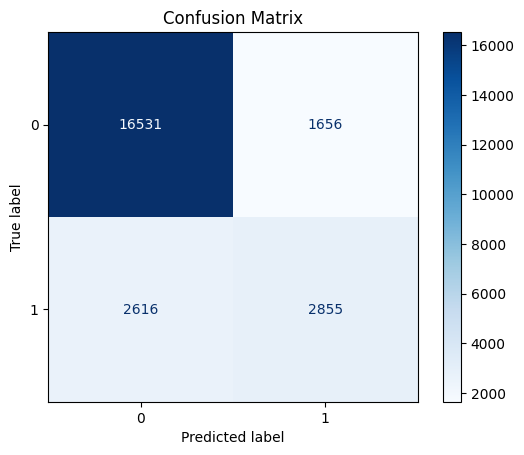

In [12]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


In [13]:
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 81.94%
